# **Introduction**

Insurance companies face a significant challenge in ensuring their profitability while providing adequate coverage to policyholders. One of the critical aspects of this challenge is pricing car insurance policies appropriately, which involves understanding the factors that impact the probability of car accidents and the resulting claim amounts. For instance, the age of the insured vehicle (auto year) has been identified as a crucial factor, as older cars tend to incur higher costs in accidents. As a result, insurance companies adjust their pricing strategies to charge higher premiums for older vehicles, reflecting the increased risk.


This project aims to investigate the factors influencing the total claim amount from customers in the event of an accident by analyzing two separate datasets from different insurance companies. The first dataset includes the following factors: Customer lifetime value, income, monthly premium auto, months since last claim, months since policy inception, number of open complaints, and number of Policies. The second dataset encompasses factors such as months as customer, policy state, policy deductible, policy annual premium, umbrella limit, insured sex, insured education level, incident state, days from bind date, and auto year.


To address this problem, we employ predictive modeling techniques to uncover the relationship between these factors and the total claim amount. Specifically, we implement Linear Regression, Decision Tree, and Naive Bayes models to gain insights into how each factor contributes to the overall claim amount. By evaluating the accuracy of these models, we aim to identify the most effective approach for predicting claim amounts based on the provided datasets.


The results of this study will provide valuable guidance to insurance companies in refining their pricing strategies. Understanding the influence of specific factors on claim amounts will enable companies to categorize car insurance policies effectively, ensuring they charge higher premiums for higher-risk vehicles while maintaining fairness and competitive pricing for their customers. Ultimately, this research will contribute to optimizing insurance companies' profitability and enhancing their ability to provide reliable and affordable coverage to policyholders.


**Literature review - ML application on Auto Insurance Industry**

There are growing trend of using machine learning techniques in the insurance industry, particularly for auto insurance. Logistic Regression, XGBoost, Random Forest, Decision Trees, Naïve Bayes and K-Nearest Neighbors (K-NN) are all commonly used to predict claim occurrence and assess risk factors accurately (Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data."). This particular study found that Random Forest (RF) performed better than the others (Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data.").



Deep learning techniques such as transfer learning-based VGG16 network are also commonly used in the industry for claim prediction (Singh, Ranjodh, Meghna P Ayyar, Tata Venkata Sri Pavan, Sandeep Gosain, and Rajiv Ratn Shah. "Automating Car Insurance Claims Using Deep Learning Techniques.")



Furthermore, machine learning algorithms are also used to handle missing data(Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques."). Currently in the industry, Artificial Neural Network (ANN), Decision Tree, Naïve Bayes, XGBoost are commonly used (Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques.")



Reference:

1) Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data." Risks 9 (2021): 42. DOI: https://doi.org/10.3390/risks9020042

2) Singh, Ranjodh, Meghna P Ayyar, Tata Venkata Sri Pavan, Sandeep Gosain, and Rajiv Ratn Shah. "Automating Car Insurance Claims Using Deep Learning Techniques." Humonics Global Pvt. Ltd., MIDAS Lab, IIIT Delhi.

3) Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques." Department of Information System, Faculty of Commerce & Business Administration, Helwan University, Cairo, Egypt. Journal of Theoretical and Applied Information Technology

## Two datasets used for analysis in this project:
Both datasets focus on US car insurance, and it is essential to acknowledge that publicly available car insurance data is relatively scarce. To ensure the validity of our comparison, we have diligently excluded datasets pertaining to different areas or countries. Additionally, we observed that the datasets serve various purposes, with some specifically targeting car insurance fraud while others aim to study used car values with limited car insurance information.

After an extensive search, we identified these two datasets as the sole sources encompassing US car insurance data, providing valuable insights into policyholders, geographic information, incident details (features), and the all-important total claim amounts (our target class for study and prediction). Given the modest data volume at our disposal, we have opted to employ k-fold cross-validation in all algorithms. This approach aids in maximizing the information utilization, enhancing the reliability of our analyses despite the limited dataset size.

dataset 1: https://www.kaggle.com/code/madhushreesannigrahi/jenks-natural-breaks-and-k-means-clustering/data

dataset 2: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

# 1. Data Exploration

**1. Data Exploration**

a.   Part 1: Basic Information about Data
We start by importing the insurance claims data from the provided CSV file.

b. To understand the size of the dataset, we calculate the number of rows (instances) and columns (features)


In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library and the dataset
import pandas as pd
df1= pd.read_csv('drive/My Drive/project datasets/AutoInsurance.csv')

In [ ]:
# Part 1: basic information about data
# 1.1 Getting the number of instances and features
print(df1.shape)

(9134, 24)


In [ ]:
print(df1.ndim)

2


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
print(df1.describe())

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

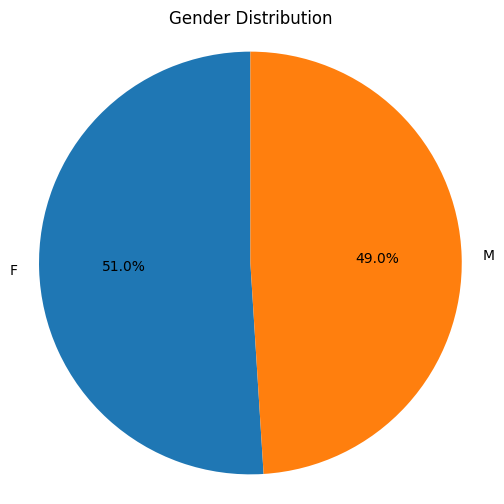

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Gender distribution
gender_counts = df1['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


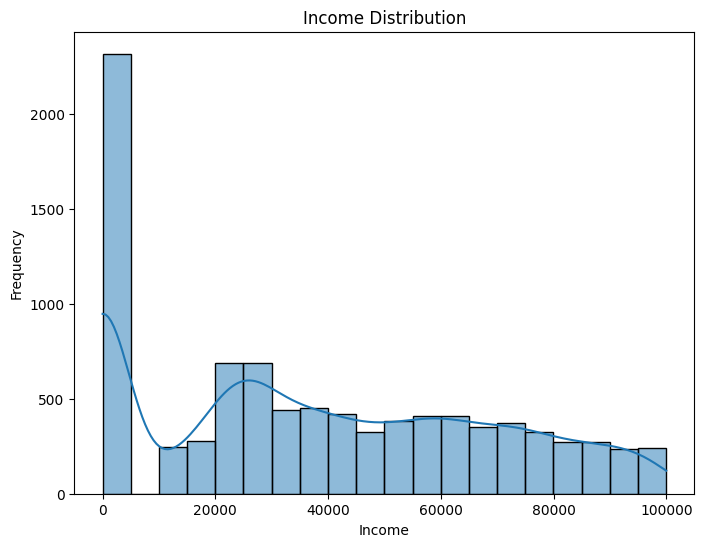

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df1['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


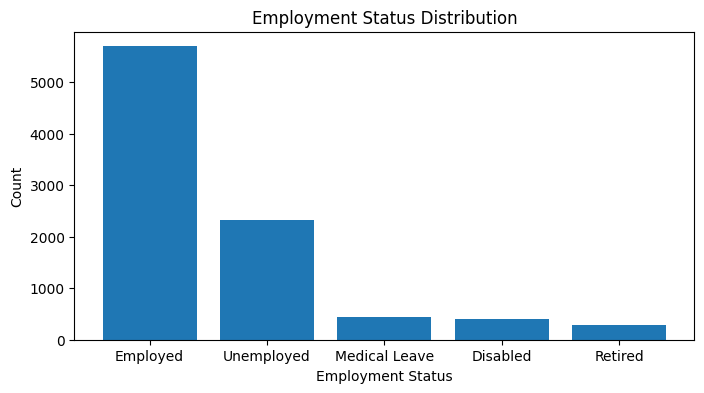

In [ ]:
# EmploymentStatus distribution
employment_counts = df1['EmploymentStatus'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(employment_counts.index, employment_counts.values)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()


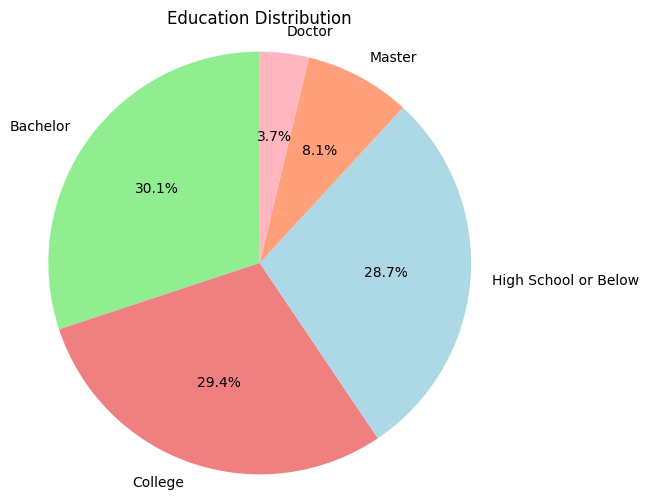

In [ ]:
# Education distribution
education_counts = df1['Education'].value_counts()
labels = education_counts.index
sizes = education_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue', 'lightsalmon', 'lightpink'])
plt.title('Education Distribution')
plt.axis('equal')

plt.show()


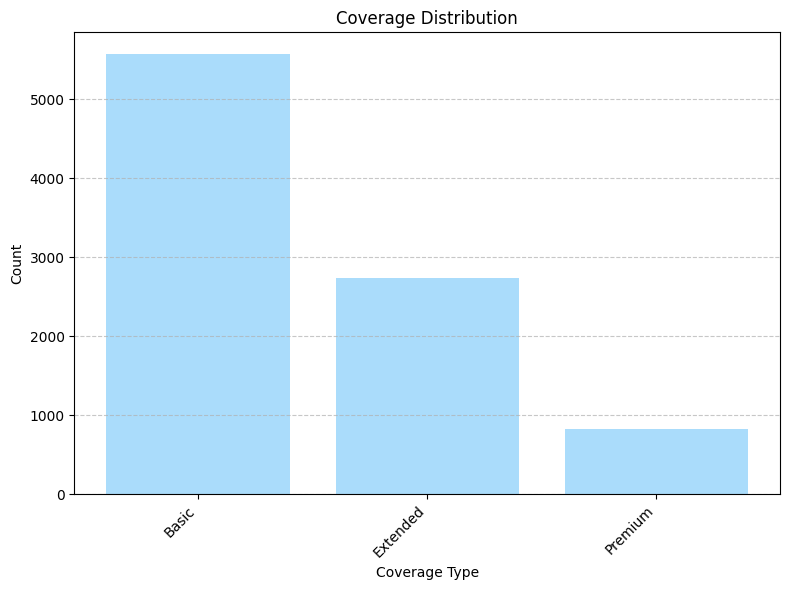

In [ ]:



# Coverage distribution
coverage_counts = df1['Coverage'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(coverage_counts.index, coverage_counts.values, color='lightskyblue', alpha=0.7)
plt.xlabel('Coverage Type')
plt.ylabel('Count')
plt.title('Coverage Distribution')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


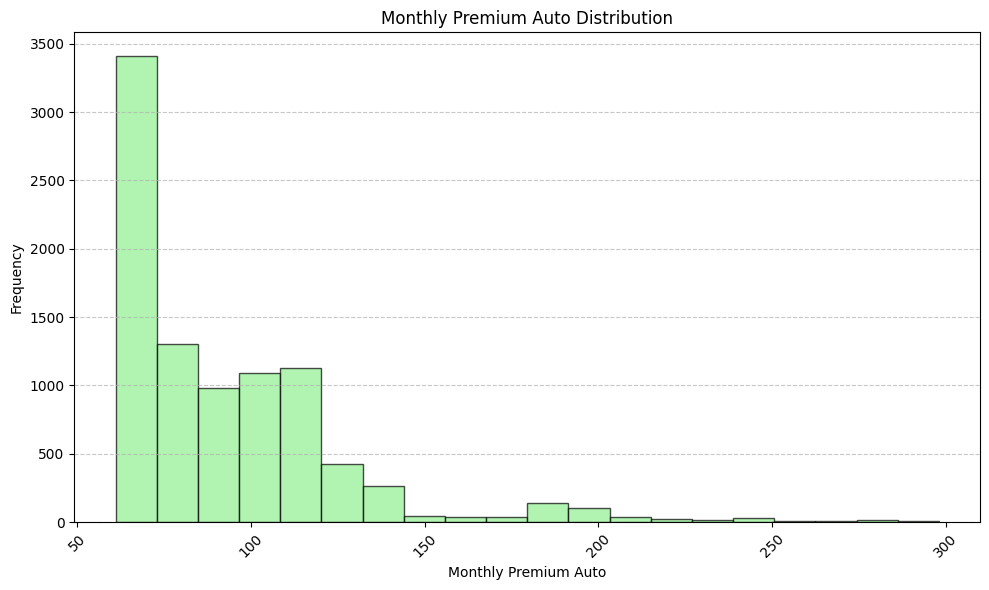

In [ ]:


# Monthly Premium Auto distribution
plt.figure(figsize=(10, 6))
plt.hist(df1['Monthly Premium Auto'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Frequency')
plt.title('Monthly Premium Auto Distribution')

# Add gridlines and customize the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

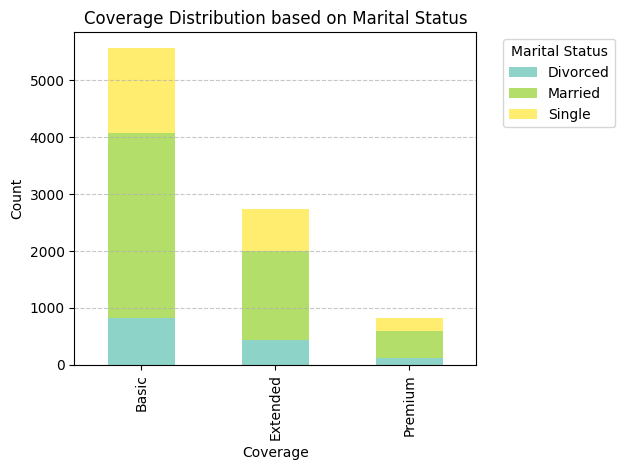

In [ ]:


# Create a crosstab to calculate the counts of each combination of Coverage and Marital Status
coverage_by_marital = pd.crosstab(df1['Coverage'], df1['Marital Status'])

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
coverage_by_marital.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.title('Coverage Distribution based on Marital Status')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


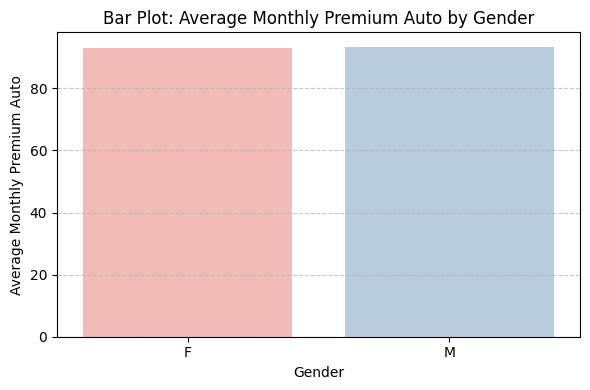

In [ ]:


# Calculate average Monthly Premium Auto by Gender
average_premium_by_gender = df1.groupby('Gender')['Monthly Premium Auto'].mean().reset_index()

# Bar plot - Average Monthly Premium Auto by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Monthly Premium Auto', data=average_premium_by_gender, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Premium Auto')
plt.title('Bar Plot: Average Monthly Premium Auto by Gender')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


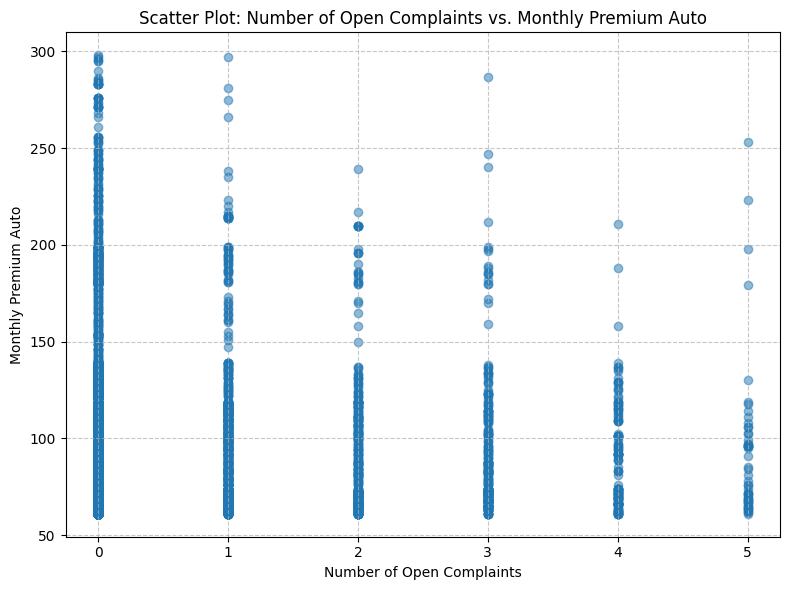

In [ ]:

# Scatter plot - Number of Open Complaints vs. Monthly Premium Auto
plt.figure(figsize=(8, 6))
plt.scatter(df1['Number of Open Complaints'], df1['Monthly Premium Auto'], alpha=0.5)
plt.xlabel('Number of Open Complaints')
plt.ylabel('Monthly Premium Auto')
plt.title('Scatter Plot: Number of Open Complaints vs. Monthly Premium Auto')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### **2. Data Cleaning**


**a.** **Removing Irrelevant Features**:  To improve the efficiency of our analysis and modeling, we remove irrelevant features from the dataset. Irrelevant features are columns that do not contribute significantly to the analysis or prediction.

**b.** **Eliminating Duplicates** : We check for and eliminate any duplicate instances in the dataset based on the 'policy_number' column, which serves as the primary key.

**c.** **Removing missing values:** We remove the '?' character which is used to represent missing values in the 'insured_sex' column.



**a. Removing Irrelevant Features**

All features are used in this model. Therefore, non of the features are removed

**b.** **Eliminating Duplicates**

In [ ]:
# Part 3: Eliminating duplicates
# The primary key: 'Customer'
print("Count before removing Duplicates: ", df1.count())

df1 = df1.drop_duplicates(subset='Customer', keep='first')
print("Count after removing Duplicates: ", df1.count())


Count before removing Duplicates:  Customer                         9134
State                            9134
Customer Lifetime Value          9134
Response                         9134
Coverage                         9134
Education                        9134
Effective To Date                9134
EmploymentStatus                 9134
Gender                           9134
Income                           9134
Location Code                    9134
Marital Status                   9134
Monthly Premium Auto             9134
Months Since Last Claim          9134
Months Since Policy Inception    9134
Number of Open Complaints        9134
Number of Policies               9134
Policy Type                      9134
Policy                           9134
Renew Offer Type                 9134
Sales Channel                    9134
Total Claim Amount               9134
Vehicle Class                    9134
Vehicle Size                     9134
dtype: int64
Count after removing Duplicates:  Custom

**c.** **Removing missing values:**

In [ ]:
# Part 4: Dealing with missing OR null values
# Options: Fill in missing value with mean or Drop row that has a missing values
print(df1.isnull().sum())
# There's no obvious missing or null values in the dataset

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


### **3. One-hot encoding**
One-hot encoded will be performed on categorical variables "insured_education_level", "insured_sex", and "policy_state" to change these variables to boolean variables.

In [ ]:
import pandas as pd

# Perform one-hot encoding on the categorical columns
df1_encoded = pd.get_dummies(df1, columns=['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
                                           'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
df1 = df1_encoded
# Display the encoded DataFrame
print(df1.head())

  Customer  Customer Lifetime Value  Income  Monthly Premium Auto  \
0  BU79786              2763.519279   56274                    69   
1  QZ44356              6979.535903       0                    94   
2  AI49188             12887.431650   48767                   108   
3  WW63253              7645.861827       0                   106   
4  HB64268              2813.692575   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2 

### **3. Plotting the Monthly premium auto variable distribution**
By using the box plot, we can quickly identify the central tendency of the data (median and quartiles) and detect any potential outliers that fall beyond the whiskers.

<Axes: xlabel='Monthly Premium Auto'>

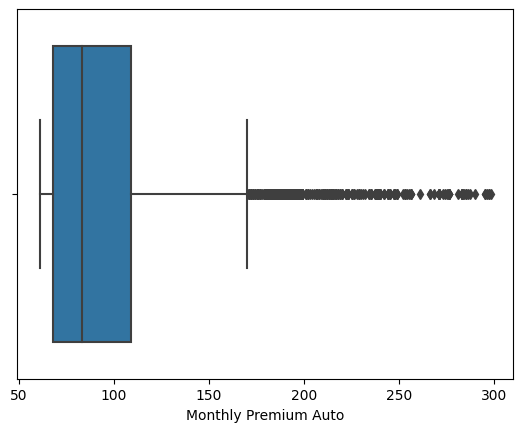

In [ ]:
# Part 6: Detecting Outliers
# On column "Monthly Premium Auto" & "Total Claim Amount"

import seaborn as sns
sns.boxplot(x=df1['Monthly Premium Auto'])

### **4. Detecting the outliers**

The outliers will be detected using Interquartile Range (IQR) Method.

In [ ]:
Q1 = df1['Monthly Premium Auto'].quantile(0.25)
Q3 = df1['Monthly Premium Auto'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df1[(df1['Monthly Premium Auto'] < lower_bound) | (df1['Monthly Premium Auto'] > upper_bound)]

# Print potential outliers
print(outliers)

41.0
     Customer  Customer Lifetime Value  Income  Monthly Premium Auto  \
31    UL64533             18975.456110   65999                   237   
45    HG65722             12819.102890   10105                   172   
79    OM82309             58166.553510   61321                   186   
123   SH36774             15023.598580   28262                   192   
181   KC11055             16936.271470   39411                   217   
...       ...                      ...     ...                   ...   
9026  UI19516             16909.927670   65620                   213   
9049  UZ14076             32104.699570   89546                   266   
9096  AA93585              7083.642205   97024                   177   
9103  CZ57208             15245.254950   30205                   195   
9125  RX91025             19872.262000       0                   185   

      Months Since Last Claim  Months Since Policy Inception  \
31                          1                             14   
45

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer Lifetime Value           4967.915247
Income                           62320.000000
Monthly Premium Auto                41.000000
Months Since Last Claim             17.000000
Months Since Policy Inception       47.000000
                                     ...     
Vehicle Class_Sports Car             0.000000
Vehicle Class_Two-Door Car           0.000000
Vehicle Size_Large                   0.000000
Vehicle Size_Medsize                 1.000000
Vehicle Size_Small                   0.000000
Length: 124, dtype: float64


<ipython-input-64-e6163f9c21b2>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-64-e6163f9c21b2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


<Axes: xlabel='Total Claim Amount'>

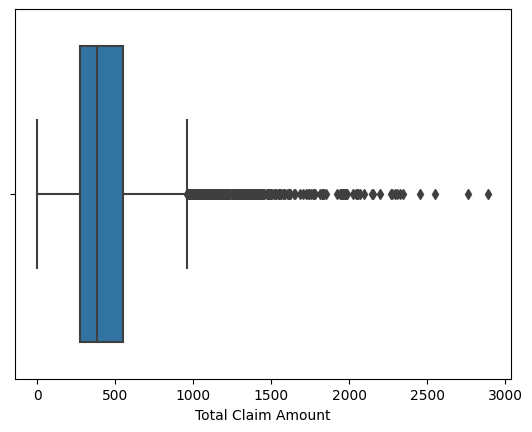

In [ ]:
# Part 6: Detecting Outliers
sns.boxplot(x=df1['Total Claim Amount'])

In [ ]:

Q1 = df1['Total Claim Amount'].quantile(0.25)
Q3 = df1['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df1[(df1['Total Claim Amount'] < lower_bound) | (df1['Total Claim Amount'] > upper_bound)]

# Print potential outliers
print(outliers)

275.25659425
     Customer  Customer Lifetime Value  Income  Monthly Premium Auto  \
1     QZ44356              6979.535903       0                    94   
73    HB20453              6781.270203       0                   104   
135   MS41162              4022.963529       0                   117   
142   LP84436              9047.119209       0                   127   
181   KC11055             16936.271470   39411                   217   
...       ...                      ...     ...                   ...   
9049  UZ14076             32104.699570   89546                   266   
9103  CZ57208             15245.254950   30205                   195   
9107  UU42868              5619.689084       0                   153   
9109  JR41742              3622.872124       0                   108   
9125  RX91025             19872.262000       0                   185   

      Months Since Last Claim  Months Since Policy Inception  \
1                          13                             

### **5. Finding the correlation between variables**
The heatmap visually represents the correlation between the numerical columns in the DataFrame. By visualizing the correlation heatmap, we can quickly identify the strength and direction of relationships between pairs of numerical columns in df2. Positive values indicate positive correlation (both variables increase or decrease together), negative values indicate negative correlation (one variable increases while the other decreases), and values near zero indicate weak or no correlation. This visualization is helpful in understanding the interdependence of variables and can provide insights about multicollinearity occurance when two or more independent variables are highly correlated with each other, making it challenging to distinguish their individual effects on the dependent variable. This can affect the stability and interpretability of regression models.

In [1]:
#Part 7.1: Heat maps

#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#c= df1.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)

**Further analysis:**

The provided code generates a scatter plot to visualize the relationship between two variables of the DataFrame df2. Scatter plots are useful for understanding the pattern and possible relationship between two continuous variables.

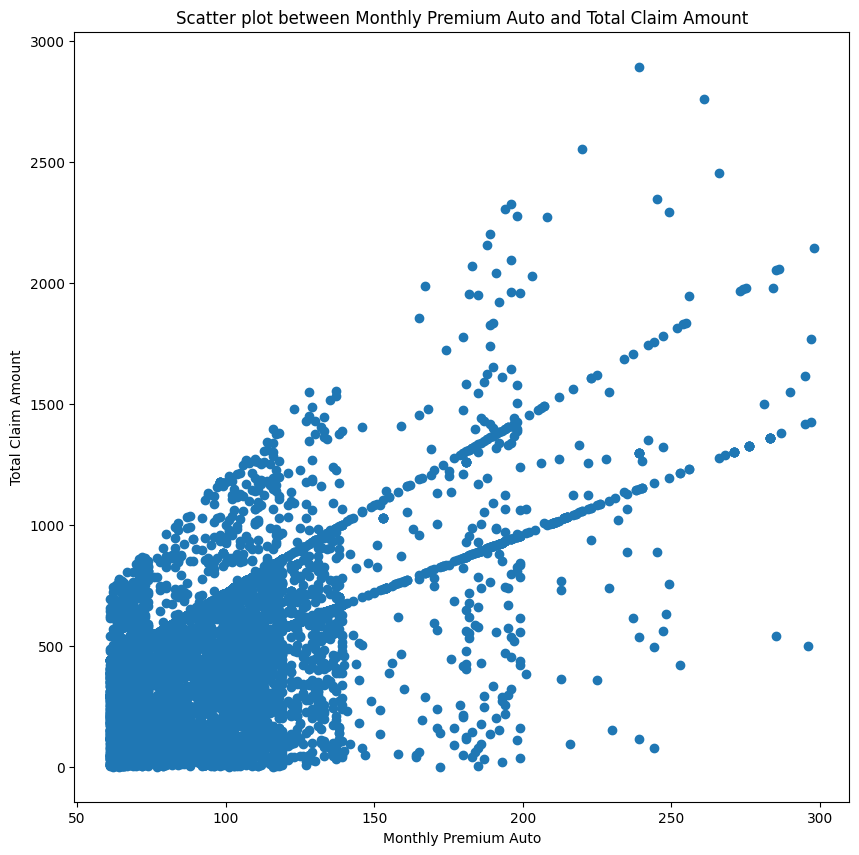

In [ ]:
#Part 7.2: Correlations
#Find correlation between any 2 attributes and draw scatter plots. Tutorial can be found here: https://seaborn.pydata.org/tutorial/introduction

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df1['Monthly Premium Auto'], df1['Total Claim Amount'])
plt.title('Scatter plot between Monthly Premium Auto and Total Claim Amount')
ax.set_xlabel('Monthly Premium Auto')
ax.set_ylabel('Total Claim Amount')
plt.show()



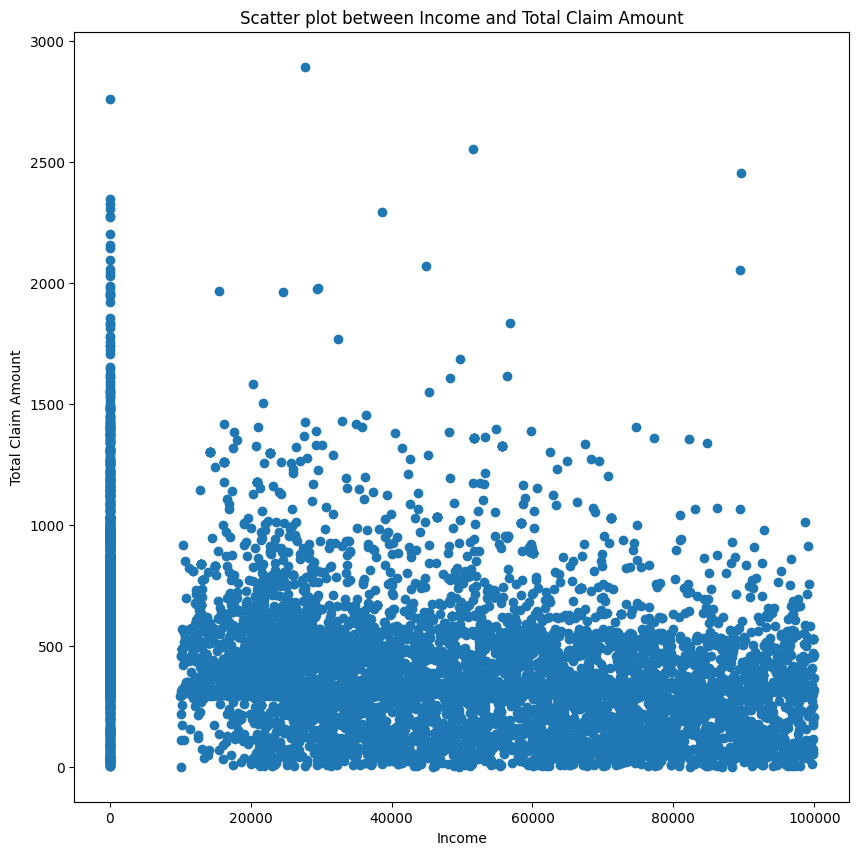

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df1['Income'], df1['Total Claim Amount'])
plt.title('Scatter plot between Income and Total Claim Amount')
ax.set_xlabel('Income')
ax.set_ylabel('Total Claim Amount')
plt.show()

-The heat map and the correlation analysis offer valuable insights into the columns that we can choose for conducting linear regression analysis.

# **6. perfprming Linear Regression model**

**Linear Regression**: Linear regression is a commonly used algorithm for analyzing the relationship between a dependent variable (in this case, the total claim amount) and independent variables (such as coverage, monthly premium, and number of open complaints).

**steps to perform linear regression model**

**a. Define x and y:**  X is defined as independent variables and y is defined as dependent variable.

**b. Split the dataset:** Split the dataset into training and testing sets.

**c. Train the linear regression model:** Fit the linear regression model to the training data.

**d. Test the model on new dataset:** We will test the model on the testing dataset.





**a. Define x and y**

In [ ]:
# 1. Import Python Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# 1. Import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

dcol = ["Total Claim Amount", "Customer"]
X = df1.drop(dcol, axis = 1 )
y = df1["Total Claim Amount"]



**b. Split the dataset**

Split the dataset into training and testing sets. In this dataset we will devide 80% of the data as training dataset and 20% of the data as testing dataset.

In [ ]:
# 2. Split data into training and testing sets
# leave 20% of data out for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**c.Train the linear regression model**

Fit the linear regression model to the training data.The linear regression model (lreg) is fitted or trained using the training set X_train and y_train. The fit() function in scikit-learn is used to fit the model to the training data, allowing it to learn the coefficients that best represent the relationship between the independent variables (X_train) and the dependent variable (y_train). After fitting the model, we use the trained model to make predictions on the test set X_test. The predict() function in scikit-learn is used to generate the predicted values of the target variable (y_pred) based on the features in the test set (X_test). Then we calculate and print two evaluation metrics: Mean Squared Error (MSE) and R-squared (R2).

In [ ]:
# 3. Build a model

# Create a LinearRegression Object
lreg = LinearRegression()

In [ ]:
# 4. Train model using train set

# fit the linear regression model to the training set
lreg.fit(X_train, y_train)

LinearRegression()

The following code creates a DataFrame that displays the coefficients of the linear regression model along with their corresponding feature names. The resulting DataFrame will have two columns: one for the feature names and the other for the corresponding coefficients. This allows you to easily inspect and analyze the impact of each feature on the target variable based on the linear regression model's results.

In [ ]:
# load the model's coefficients into a dataframe to see which features contributes to the outcome prediction the most ("Total Claim Amount")
pd.DataFrame(lreg.coef_, X.columns, columns=['Coeff'])

,Coeff
Customer Lifetime Value,1.422940e-04
Income,-1.948076e-04
Monthly Premium Auto,5.151609e+00
Months Since Last Claim,2.774201e-01
Months Since Policy Inception,-2.648050e-02
...,...
Vehicle Class_Sports Car,4.702940e+09
Vehicle Class_Two-Door Car,4.702940e+09
Vehicle Size_Large,-4.133934e+09
Vehicle Size_Medsize,-4.133934e+09


**d. Test the model on a new dataset**

in the following code a trained linear regression model is used to make predictions on the test set (X_test). After running this code, the variable predictions will contain the predicted target values corresponding to the features in the test set. These predicted values represent the model's estimates of the dependent variable based on the independent variables in the test set. The model's performance can be evaluated by comparing these predicted values (predictions) to the actual target values in the test set (y_test). This comparison is typically done using evaluation metrics like Mean Squared Error (MSE), R-squared (R2), or others, which were calculated in the code snippet you provided earlier.

In [ ]:
# 5. Predict the targets of the test set

# use the model to predict the prices of the test set
predictions = lreg.predict(X_test)

### **7. Evaluation**

In the following code, the model's predictions are compared to the actual target values from the test set, and the accuracy of the model is visually assessed using a scatter plot.

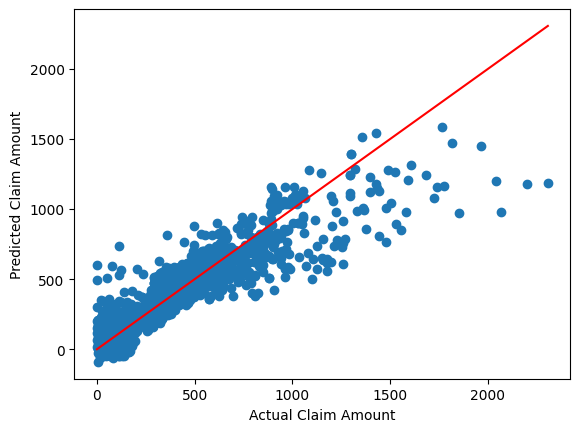

In [ ]:
# 6. Calculate the accuracy of the model

# let's visualize predictions vs. ground truth
plt.scatter(y_test, predictions)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-r')

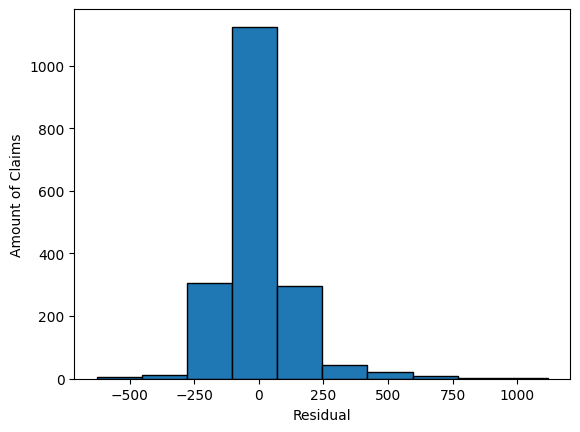

In [ ]:
# visualize the residuals
plt.hist(y_test - predictions, edgecolor='black')
plt.ylabel("Amount of Claims")
plt.xlabel("Residual")
plt.show()

The Mean Absolute Error (MAE) is calculated to evaluate the performance of the linear regression model.     The MAE represents the average magnitude of the errors made by the model in its predictions. A lower MAE indicates that the model's predictions are closer to the actual values, and therefore, the model is more accurate. Conversely, a higher MAE suggests that the model's predictions have larger errors and are less accurate.

The MAE provides a straightforward measure of the model's predictive performance, and it is easy to interpret since it represents the average error in the same units as the target variable. It is an absolute measure, meaning that it does not differentiate between overestimation and underestimation. Smaller MAE values are generally preferred as they indicate better model accuracy and less deviation from the true values.

Overall, the MAE is one of several metrics used to evaluate regression models, and it is particularly useful when you want to assess the model's performance in terms of absolute errors. It provides valuable insights into how well the model is capturing the underlying patterns in the data and how close its predictions are to the true values.

In [ ]:
# calculate the mean absolute error
metrics.mean_absolute_error(y_test, predictions)

97.66063848910473

The Root Mean Square Error (RMSE) is calculated to evaluate the performance of the linear regression model. The RMSE is defined as the square root of the MSE. The RMSE is a valuable metric for assessing the performance of regression models, especially when accuracy is a crucial factor. However, it is essential to interpret the RMSE value in the context of the specific problem and the scale of the target variable.



In [ ]:
# calculate the mean squared error
metrics.mean_squared_error(y_test, predictions)

20956.322092536935

In [ ]:
# calculate the Root-Mean-Square
np.sqrt(metrics.mean_squared_error(y_test, predictions))

144.76298592021698

In [ ]:
# Calculate R square

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.7655867728905879


**K-fold cross validation for Linear Regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to store evaluation metrics for each fold
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Define the number of folds for cross-validation
num_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Linear Regression model
    lreg = LinearRegression()
    lreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lreg.predict(X_test)

    # Calculate the evaluation metrics for this fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append the scores to the respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate the average scores across all folds
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Print the average scores
print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)
print("Average RMSE:", avg_rmse)
print("Average R-squared:", avg_r2)



Average MAE: 95.87968093150064
Average MSE: 19619.279063027596
Average RMSE: 140.03678186985573
Average R-squared: 0.767324638683369


## Conclusion for linear regression
1. Linear Regression is a regression algorithm used for predicting continuous numerical values. In our dataset, it is used to predict the "Total Claim Amount," which is a continuous value representing the claim amount. The model tries to find a linear relationship between the input features and the target variable to make predictions.
2. The performance metrics obtained for the Linear Regression model (Average MAE, MSE, RMSE, and R-squared) indicate that the model's predictions are not as accurate as desired. The R-squared value of approximately 50% suggests that the model explains only around 50% of the variance in the "Total Claim Amount" using the given features. This relatively low R-squared value implies that the linear relationship might not fully capture the underlying complexity in the data.

# Business Insights:
1. Monthly Premium Auto: The coefficient of 5.445981 suggests that an increase in the Monthly Premium Auto will significantly contribute to an increase in the predicted total claim amount. This indicates that customers with higher monthly premiums are expected to file higher claim amounts.

2. Vehicle Class_Sports Car: The coefficience of -37.678318 suggest that Sports cars are often driven by enthusiasts who take extra care while driving, as these cars are designed for performance and handling rather than everyday commuting. Additionally, sports cars are typically driven for recreational purposes and may not be used as frequently for daily commuting or in congested traffic, which can reduce the likelihood of accidents and claims. Moreover, sports car owners often invest in advanced safety features and technologies, which can further contribute to the lower claim amounts.

2. Vehicle Class_Two-Door Car (1.630312): The positive coefficient for Vehicle Class_Two-Door Car suggests that customers with two-door cars tend to have higher Total Claim Amounts compared to the baseline category. Two-door cars are often sportier and may have higher repair costs, which can contribute to higher claim amounts.

3. Vehicle Size_Medsize (0.701209) and Vehicle Size_Small (0.685017): The positive coefficients for both vehicle sizes indicate that customers with medium-sized and small-sized vehicles tend to have higher Total Claim Amounts compared to the baseline category. This might be due to various factors such as the frequency of accidents or the repair costs associated with different vehicle sizes.

4. vehicle Class_SUV (1.469475): The positive coefficient for Vehicle Class_SUV suggests that customers with SUVs tend to have higher Total Claim Amounts compared to the baseline category. SUVs are often larger and more expensive vehicles, which might lead to higher repair or replacement costs in the event of accidents or damages, contributing to larger claim amounts.


# Decision Trees
 This code implements Decision Tree Regression to predict the total claim amount in an auto insurance dataset. The goal is to build a regression model that accurately predicts the total claim amount based on selected features.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


df3= pd.read_csv('drive/My Drive/project datasets/AutoInsurance.csv')
df3.head()

# Custom Color Palette
red_blue = ['#19B5FE','#EF4836']
pallete = sns.color_palette(red_blue)
sns.set_palette(pallete)
sns.set_style('white')



## Feature Selection
Selected features for the feature matrix (X) include:

1. Customer Lifetime Value: The lifetime value of the customer to the insurance company.
2. Income: The income of the customer.
3. Coverage: The type of coverage chosen by the customer.
4. Months Since Last Claim: The number of months since the customer's last claim.
5. Number of Policies: The number of insurance policies held by the customer.

In [ ]:
selected_features = ['Customer Lifetime Value', 'Income', 'Coverage', 'Months Since Last Claim', 'Number of Policies']
X = df3[selected_features]
y = df3['Total Claim Amount']




## Data Preprocessing
The categorical column Coverage is encoded using one-hot encoding to convert it into a numerical format. The resulting feature matrix X_encoded is ready for model training.



In [ ]:
#performing on-hot encoding on 'Coverage' column
categorical_columns = ['Coverage']
X_encoded = pd.get_dummies(X, columns=categorical_columns)
X_encoded.head()




,Customer Lifetime Value,Income,Months Since Last Claim,Number of Policies,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,2763.519279,56274,32,1,1,0,0
1,6979.535903,0,13,8,0,1,0
2,12887.431650,48767,18,2,0,0,1
3,7645.861827,0,18,7,1,0,0
4,2813.692575,43836,12,1,1,0,0


## Data Splitting
The dataset is split into training and testing sets using train_test_split, with 80% of the data for training and 20% for testing.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Create the decision tree regressor with min_samples_split parameter

regressor = DecisionTreeRegressor(min_samples_split=150)

In [ ]:
# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=150)

## Prediction and Evaluation
The model is used to predict the total claim amount on the testing set. Evaluation metrics are computed to assess the model's performance:

1. Mean Absolute Error (MAE): The average absolute difference between the predicted and true values of the total claim amount.
2. Mean Squared Error (MSE): The average squared difference between the predicted and true values of the total claim amount.
3. R-squared (R2) Score: A measure of how well the model explains the variance in the total claim amount. It represents the proportion of variance in the dependent variable that is predictable from the independent variables.

In [ ]:
# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 156.88203747960355
Mean Squared Error: 46537.120328845864
R-squared: 0.4147087010932905


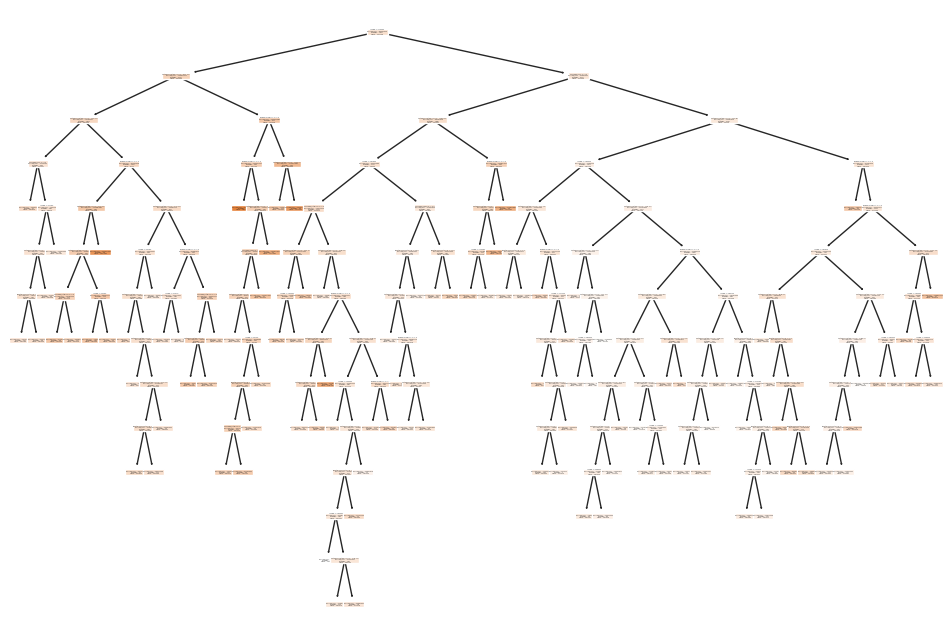

In [ ]:

plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, filled=True, feature_names=X_encoded.columns)
plt.show()

## Better Visualization of the Decision tree

In [ ]:
pip install pydotplus


In [ ]:
from IPython.display import Image
import pydotplus
dot_data = export_graphviz(regressor, out_file=None, feature_names=X_encoded.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Adjust the size of the visualization
graph.set_size('"4000,4000!"')
graph.set_margin(0.5)

# Generate the PNG image with adjusted size
png_bytes = graph.create_png()
Image(png_bytes)

Output hidden; open in https://colab.research.google.com to view.

**k-Fold cross validation for Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df3 = pd.read_csv('drive/My Drive/project datasets/AutoInsurance.csv')

selected_features = ['Customer Lifetime Value', 'Income', 'Coverage', 'Months Since Last Claim', 'Number of Policies']
X = df3[selected_features]
y = df3['Total Claim Amount']

categorical_columns = ['Coverage']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Create the decision tree regressor
regressor = DecisionTreeRegressor(min_samples_split=150)

# Define the number of folds for cross-validation
k = 5

# Initialize lists to store the evaluation metrics for each fold
mae_scores = []
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
kf = KFold(n_splits=k)
for train_index, val_index in kf.split(X_encoded):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = regressor.predict(X_val)

    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Append the scores to the respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores across all folds
avg_mae = sum(mae_scores) / k
avg_mse = sum(mse_scores) / k
avg_r2 = sum(r2_scores) / k

# Print the average scores
print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)
print("Average R-squared:", avg_r2)


Average MAE: 156.2785330755155
Average MSE: 48153.852997000446
Average R-squared: 0.428164288378718


# Decision tree 2 with more categorical columns (IMPROVED PERFORMANCE)
In this section, we build a Decision Tree Regression model to predict the total claim amount in the auto insurance dataset using more categorical columns in order to improve the results

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

#Importing data
df_d= pd.read_csv('drive/My Drive/project datasets/AutoInsurance.csv')

# Custom Color Palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')



## Feature Selection
The features selected in this model are:
1. EmploymentStatus
2. Gender
3. Income
4. Monthly Premium Auto
5. Number of Open Complaints
6. Coverage
7. Education
8. Location Code
9. Marital Status
10. Policy Type

In [ ]:
# Selecting the desired columns for  feature matrix
selected_features = ['EmploymentStatus', 'Gender', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', 'Coverage', 'Education', 'Location Code', 'Marital Status', 'Policy Type']

# Create the feature matrix X
X = df_d[selected_features]




### Data Processing
Since some features in the dataset are categorical, we perform categorical conversion and one-hot encoding to prepare the data for modeling.

In [ ]:
# Performing the same categorical conversion as done in the Naive Bayes code

X.loc[:, 'EmploymentStatus'] = X['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})
X.loc[:, 'Gender'] = X['Gender'].map({'F': 1, 'M': 0})

# Applying one-hot encoding to the entire X
X_encoded = pd.get_dummies(X, columns=['Coverage', 'Education', 'Location Code', 'Marital Status', 'Policy Type'])

# Filling missing values with the mean of each column using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)



<ipython-input-107-c2b4a173f301>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'EmploymentStatus'] = X['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})
<ipython-input-107-c2b4a173f301>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'EmploymentStatus'] = X['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})
<ipython-input-107-c2b4a173f301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Data Splitting and Model Training
The dataset was split into training and testing sets using the train_test_split function from sklearn.model_selection. The testing set contains 20% of the data.

Then the Decision Tree Regression model is created and trained using the selected features on the training data.

## Model Evaluation
We make predictions on the testing set using the trained model and evaluate its performance using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

In [ ]:
# Creating the target variable y
y = df_d['Total Claim Amount']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

# Create the decision tree regressor with min_samples_split and min_samples_leaf parameters
regressor = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=5)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 79.73742214594434
Mean Squared Error: 16173.517164491697
R-squared: 0.7965877819210978


## Visualizing the Decision Tree

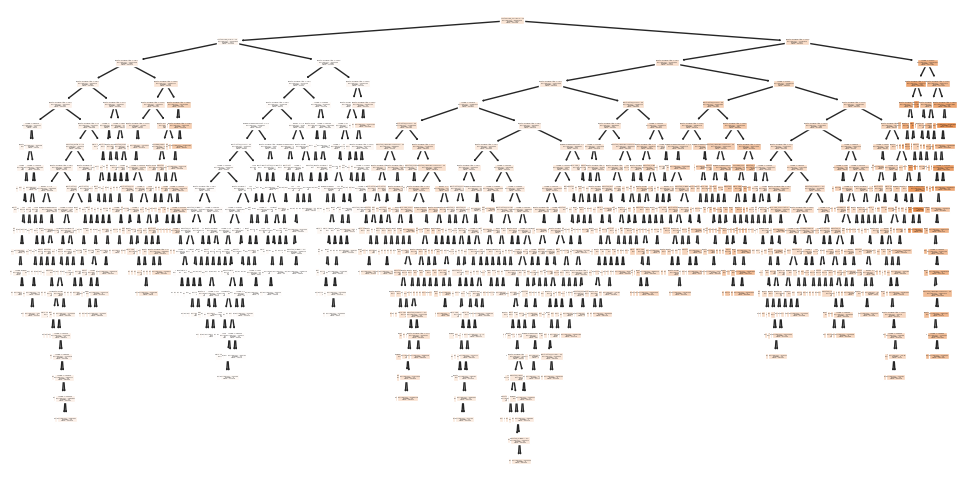

In [ ]:
# Display the decision tree
plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=X_encoded_imputed.columns, filled=True)
plt.show()

## Feature Impact Analysis
The below mentioned code is to understand what features have the highest impact on the results

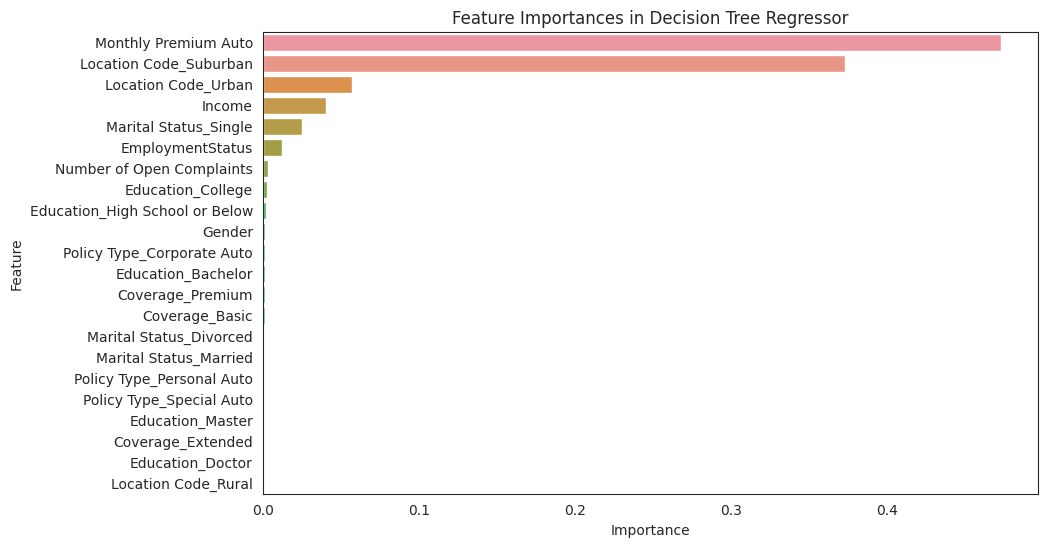

In [ ]:


# Get the feature importances from the trained Decision Tree regressor
feature_importances = regressor.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded_imputed.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## K fold cross validation:

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Importing data
df_dTest = pd.read_csv('drive/My Drive/project datasets/AutoInsurance.csv')

# Custom Color Palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

# Selecting the desired columns for the feature matrix
selected_features = ['EmploymentStatus', 'Gender', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', 'Coverage', 'Education', 'Location Code', 'Marital Status', 'Policy Type']

# Create the feature matrix X
X = df_dTest[selected_features]

# Performing the same categorical conversion as done in the Naive Bayes code
X['EmploymentStatus'] = X['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})
X['Gender'] = X['Gender'].map({'F': 1, 'M': 0})

# Applying one-hot encoding to the entire X
X_encoded = pd.get_dummies(X, columns=['Coverage', 'Education', 'Location Code', 'Marital Status', 'Policy Type'])

# Filling missing values with the mean of each column using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Creating the target variable y
y = df_dTest['Total Claim Amount']

# Create the decision tree regressor with min_samples_split and min_samples_leaf parameters
regressor = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=5)

# Define the number of folds for cross-validation
k = 5

# Initialize lists to store the evaluation metrics for each fold
mae_scores = []
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
kf = KFold(n_splits=k)
for train_index, val_index in kf.split(X_encoded_imputed):
    X_train, X_val = X_encoded_imputed.iloc[train_index], X_encoded_imputed.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = regressor.predict(X_val)

    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Append the scores to the respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores across all folds
avg_mae = sum(mae_scores) / len(mae_scores)
avg_mse = sum(mse_scores) / len(mse_scores)
avg_r2 = sum(r2_scores) / len(r2_scores)

# Print the average scores
print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)
print("Average R-squared:", avg_r2)


<ipython-input-41-4074aaafd418>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['EmploymentStatus'] = X['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})
<ipython-input-41-4074aaafd418>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'F': 1, 'M': 0})


Average MAE: 79.8887405783457
Average MSE: 15958.791241024603
Average R-squared: 0.8103767601317913


# Conclusion:
In summary, the Decision Tree model offers useful insights into the variables that have the biggest effects on forecasting the Total Claim Amount in auto insurance. The model's R-squared value was a respectable 0.81, meaning that the chosen features can account for about 81% of the variation in claim amounts.

1. One of the key elements influencing the Total Claim Amount was the "**Location Code**" feature. It implies that an important factor in deciding the cost of a claim for an insured person is their location. This conclusion emphasises the significance of taking regional variations in risk profiles and claim trends into account when determining insurance policy pricing. According to our results, the people living in suburban and Urban areas have the highest claims.

2. '**Income**' and '**Monthly Premium Auto**' are two more crucial elements that significantly influence claim amounts. Increased claim expenses are correlated with higher income levels and premium payments. larger income-earning insured people might choose policies with larger coverage limits or more comprehensive coverage, which would result in bigger claim payouts in the event of an accident.

3. The '**Marital Status**' feature also has a big impact on how much is paid out in claims. When compared to single people, married people may have different risk profiles, which might affect how likely they are to submit claims and how much those claims will cost. Understanding this link might help determine the best pricing and coverage options for various marital status groupings.

# NaiveBayes

In this code, we implemented NaiveBayes methodology to predict the total claim amount in Auto Insurance dataset (dataset 1). The goal is to build a NaiveBayes classifier that accurately predicts the total claim amount classification (High/Low) based on selected features.

In [ ]:
# Step 1.2: Data Preprocessing
# Convert labels to binary variables
# Outcome in the new column "Binary Outcome for NaiveBayes", which turns a numerical result into a Binary result

In [ ]:
# Import libraries necessary for NaiveBayes method

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Create a copy of dataset 1 "df1", named "df1_B", so that the data cleaning/conversion for NaiveBayes doesn't affect the dataset used for other methods.
df1_B = df1.copy(deep=True)

In [ ]:
# Modify the view of datasets (Optional)

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

## Feature Selection

1) Categorical Converted to Binary:

*    EmploymentStatus: Binary variable representing employment status. It includes two categories: "Employed" (mapped to 1) and "Unemployed" (mapped to 0).
*   Gender: Binary variable representing gender. It includes two categories: "Female" (mapped to 1) and "Male" (mapped to 0).


2) Categorical to One-Hot Encoding:

*   Coverage: Categorical variable representing the type of coverage chosen by the policyholder. One-hot encoding is applied to create binary variables for each coverage type.
*   Education: Categorical variable representing the education level of the policyholder. One-hot encoding is applied to create binary variables for each education category.

*   Location Code: Categorical variable representing the geographical location code of the policyholder. One-hot encoding is applied to create binary variables for each location code.
*   Marital Status: Categorical variable representing the marital status of the policyholder. One-hot encoding is applied to create binary variables for each marital status category.
*   Policy Type: Categorical variable representing the type of insurance policy. One-hot encoding is applied to create binary variables for each policy type.


3) Numerical to Binary with Medium:

*   Income: Numerical variable representing the income level of the policyholder. The column is split at the 50th percentile value, and values greater than or equal to the cutoff are mapped to 1, while values below the cutoff are mapped to 0.

*   Monthly Premium Auto: Numerical variable representing the monthly premium amount. The column is split at the 50th percentile value, and values greater than or equal to the cutoff are mapped to 1, while values below the cutoff are mapped to 0.

*  Number of Open Complaints: Numerical variable representing the number of open complaints. The column is split at the 50th percentile value, and values greater than or equal to the cutoff are mapped to 1, while values below the cutoff are mapped to 0.


These feature selection & data cleaning/conversion techniques are applied to making it suitable for the NaiveBayes method's binary input requirements. The resulting dataset is now well-prepared for analysis and prediction using the NaiveBayes method.

In [ ]:
# Data Cleaning for NaiveBayes method
# Reason for this step is that NaiveBayes takes binary inputs and returns binary outputs. We need to convert all numerical/categorical variables into binary.

# Update "EmploymentStatus" to have only "Employed" and "Unemployed"
# Note: Binary conversion is used other than one-hot encoding as we believe only "Employed" or "Unemployed" makes difference when predicting the outcome, while minor difference amount the reason of unemployed (retired, disabled, medical leave, unemployed).
# Note: Binary conversion is done also for the simplicity reason.
df1_B.loc[df1_B['EmploymentStatus'] != 'Employed', 'EmploymentStatus'] = 'Unemployed'

# Map 'Employed' to 1, and 'Unemployed' to 0
df1_B['EmploymentStatus'] = df1_B['EmploymentStatus'].map({'Employed': 1, 'Unemployed': 0})

# Update column "Gender", map 'F' to 1, and 'M' to 0
df1_B['Gender'] = df1_B['Gender'].map({'F': 1, 'M': 0})



# Mapping for numerical columns:

# Numerical variables to split, to map it to binary
numerical_x = ['Income', 'Monthly Premium Auto', 'Number of Open Complaints']

# Set the breakdown point at 50th percentile
breakdown_point_x = 0.5

for column in numerical_x:
    # Find the cutoff value at the 50th percentile
    cutoff = df1_B[column].quantile(breakdown_point_x)
    # Map higher part to 1 and lower part to 0
    df1_B[column] = df1_B[column].apply(lambda x: 1 if x >= cutoff else 0)


# Columns with multiple categories, which we apply one-hot-encoding: Coverage, Education, Location Code, Marital Status, Policy Type
# Outline a list of columns to apply one-hot encoding
one_hot_encoding_columns = ['Coverage', 'Education', 'Location Code', 'Marital Status', 'Policy Type']

# Apply one-hot encoding to the specified columns
df1_B = pd.get_dummies(df1_B, columns=one_hot_encoding_columns)


## Data Preprocessing
We break down the outcome variable (i.e., 'Total Claim Amount') based on percentile values. This breakdown is achieved by dividing the data at specific percentiles, such as the 50th percentile, and then creating a binary outcome column accordingly. The newly generated binary outcome column, labeled as 'Binary Outcome for NaiveBayes_Xpercentile,' contains binary values (0 or 1) representing whether the 'Total Claim Amount' falls below or above the specified percentile cutoff. The binary values of 0 or 1 are what we are targeting to predict.


## Data Splitting
The dataset is split into training and testing sets using train_test_split, with 80% of the data for training and 20% for testing.

## Prediction and Evaluation

Once trained, the model makes predictions on the testing set ('X_test'), generating binary class labels for each sample.

The following evaluation techniques are applied:

*   Accuracy Score: measures overall correctness of the classifier's predictions by the ratio of correct predictions to total predictions.
*   Precision Score: quantifies the proportion of true positive predictions out of all positive predictions made by the classifier.
*   Recall Score: measures the proportion of true positive predictions out of all actual positive instances in the dataset.
*   F1 Score: provides a balance between precision and recall by taking the harmonic mean of the two metrics, useful for imbalanced datasets.

In [ ]:
# Breakdown the outcome data by percentile, and then make prediction

breakdown_point = [0.5]#, 0.70]

for point in breakdown_point:
    # Add columns to the dataset
    column_name = f'Binary Outcome for NaiveBayes_{point*100:.0f}percentile'
    if column_name not in df1_B.columns:
      cutoff = df1_B['Total Claim Amount'].quantile(point)
      df1_B.insert(df1_B.columns.get_loc('Total Claim Amount') + (breakdown_point.index(point)+1), column_name, df1_B['Total Claim Amount'].apply(lambda x: 0 if x < cutoff else 1))

    # Define x's and y
    y = df1_B[column_name]

    # Drop the columns that are not necessary, and leave all features we want to keep in the dataset "X"

    # Columns to drop
    columns_to_drop_for_X = ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Effective To Date',
                      'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies',
                      'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
                      'Total Claim Amount']

    # Create a new DataFrame X containing the remaining columns (features)
    X = df1_B.drop(columns=columns_to_drop_for_X)


    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Instantiate and train the Naive Bayes model
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)
    predictions = naive_bayes.predict(X_test)

    # Print predictions
    print(predictions)

    # Print evaluation scores
    print(f'Accuracy Score_{point*100:.0f}percentile:', accuracy_score(y_test, predictions))
    print(f'Precision Score_{point*100:.0f}percentile:', precision_score(y_test, predictions))
    print(f'Recall Score_{point*100:.0f}percentile:', recall_score(y_test, predictions))
    print(f'F1 Score_{point*100:.0f}percentile:', f1_score(y_test, predictions))



[1 1 1 ... 1 1 1]
Accuracy Score_50percentile: 0.9666119321291735
Precision Score_50percentile: 0.9362591431556949
Recall Score_50percentile: 1.0
F1 Score_50percentile: 0.9670804101457097
                                       Feature  Log Probability
5   Binary Outcome for NaiveBayes_50percentile         8.104521
8                             Coverage_Premium         1.244102
3                         Monthly Premium Auto         0.944228
15                      Location Code_Suburban         0.855788
19                       Marital Status_Single         0.621215
7                            Coverage_Extended         0.538227
12              Education_High School or Below         0.261225
22                    Policy Type_Special Auto        -0.057451
20                  Policy Type_Corporate Auto        -0.088645
4                    Number of Open Complaints        -0.094394
21                   Policy Type_Personal Auto        -0.098095
9                           Education_Bachel

(array([846.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 981.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

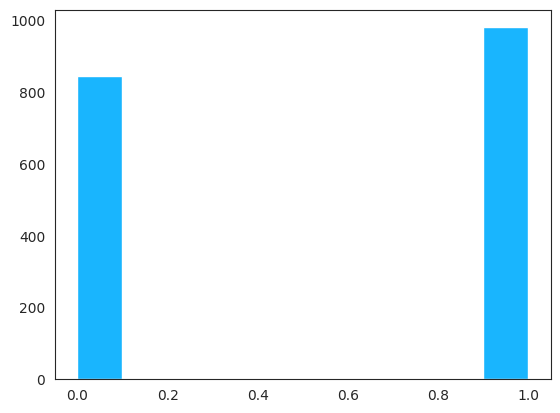

In [ ]:
from matplotlib import pyplot as plt
plt.hist(predictions)

## Logging probabilities for each feature
The below code helps us to understand which feature has the highest impact on the result

In [ ]:
feature_log_probs = naive_bayes.feature_log_prob_[1] - naive_bayes.feature_log_prob_[0]

# Create a DataFrame to store feature names and their corresponding log probabilities
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Log Probability': feature_log_probs})

# Sort the DataFrame by log probabilities to get the most impactful features
most_impactful_features = feature_importance_df.sort_values(by='Log Probability', ascending=False)

print(most_impactful_features)

                                       Feature  Log Probability
5   Binary Outcome for NaiveBayes_50percentile         8.104521
8                             Coverage_Premium         1.244102
3                         Monthly Premium Auto         0.944228
15                      Location Code_Suburban         0.855788
19                       Marital Status_Single         0.621215
7                            Coverage_Extended         0.538227
12              Education_High School or Below         0.261225
22                    Policy Type_Special Auto        -0.057451
20                  Policy Type_Corporate Auto        -0.088645
4                    Number of Open Complaints        -0.094394
21                   Policy Type_Personal Auto        -0.098095
9                           Education_Bachelor        -0.145910
10                           Education_College        -0.169766
1                                       Gender        -0.241231
17                     Marital Status_Di

**K-Fold cross validation for NaiveBayes**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB


# Define the number of folds for k-fold cross-validation
num_folds = 5

# Initialize k-fold cross-validation with the specified number of folds
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Breakdown the outcome data by percentile, and then make prediction
breakdown_point = [0.5]#, 0.70]

for point in breakdown_point:
    # Add columns to the dataset if they don't already exist
    column_name = f'Binary Outcome for NaiveBayes_{point*100:.0f}percentile'
    if column_name not in df1_B.columns:
        cutoff = df1_B['Total Claim Amount'].quantile(point)
        df1_B.insert(df1_B.columns.get_loc('Total Claim Amount') + (breakdown_point.index(point)+1), column_name, df1_B['Total Claim Amount'].apply(lambda x: 0 if x < cutoff else 1))

    # Define x's and y
    y = df1_B[column_name]

    # Create lists to store evaluation scores for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Instantiate and train the Naive Bayes model
        naive_bayes = MultinomialNB()
        naive_bayes.fit(X_train, y_train)
        predictions = naive_bayes.predict(X_test)

        # Append evaluation scores to respective lists
        accuracy_scores.append(accuracy_score(y_test, predictions))
        precision_scores.append(precision_score(y_test, predictions))
        recall_scores.append(recall_score(y_test, predictions))
        f1_scores.append(f1_score(y_test, predictions))

    # Print the evaluation scores for each fold
    print(f'Evaluation Scores for {int(point*100)}percentile:')
    print('Accuracy Scores:', accuracy_scores)
    print('Mean Accuracy:', np.mean(accuracy_scores))
    print('Precision Scores:', precision_scores)
    print('Mean Precision:', np.mean(precision_scores))
    print('Recall Scores:', recall_scores)
    print('Mean Recall:', np.mean(recall_scores))
    print('F1 Scores:', f1_scores)
    print('Mean F1:', np.mean(f1_scores))


Evaluation Scores for 50percentile:
Accuracy Scores: [0.9573070607553367, 0.9682539682539683, 0.963327859879584, 0.9616858237547893, 0.9671412924424972]
Mean Accuracy: 0.9635432010172351
Precision Scores: [0.919917864476386, 0.9416498993963782, 0.9298429319371728, 0.9296482412060302, 0.9389002036659878]
Mean Precision: 0.9319918281363909
Recall Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Recall: 1.0
F1 Scores: [0.958288770053476, 0.9699481865284973, 0.9636462289744981, 0.9635416666666667, 0.9684873949579832]
Mean F1: 0.9647824494362244


## Conclusion for NaiveBaye's results

The model's evaluation on the car insurance data using the 50th percentile as the threshold for binary classification shows promising performance. It achieved a high accuracy score of approximately 96%, indicating that the model correctly predicts the policyholders' 'Total Claim Amount' in the binary format with a considerable accuracy rate. The precision score of approximately 92% suggests that when the model predicts a positive claim ('1'), it is reliable in its predictions. Moreover, the recall score of 100% demonstrates the model's ability to identify all actual positive claims correctly. The F1 score of approximately 96% further reinforces the overall effectiveness of the model in predicting 'Total Claim Amount' for car insurance policyholders.

In binary classification with Naive Bayes, the model is predicting a discrete binary outcome, which is either 0 or 1. This type of problem can sometimes be easier for the model to learn and make accurate predictions, especially if there are distinct patterns or separability in the data.

## Business insights based on the features that have the most impact on the results
**Premium Coverage Type**: People with "Premium" coverage are more likely to have larger Total Claim Amounts, hence premium coverage matters. This data implies that more expensive coverage alternatives result in higher claim payouts, highlighting the need of providing comprehensive insurance options to clients looking for more coverage.

**Income**: Contrary to popular belief, consumers with higher salaries typically have smaller Total Claim Amounts. This realisation shows that people with higher incomes may be more risk-averse and take proactive steps to minimise future claims. Insurance providers can use this data to create tailored promotions and rewards that will motivate higher-income clients to keep their policies active.

**Location Impact**: Compared to residents of urban or rural areas, customers who live in suburbs typically have larger Total Claim Amounts. Based on local risk profiles, insurance companies might modify their pricing or claim-processing tactics using this information.

**Education**: Higher-educated clients tend to have lower Total Claim Amounts, suggesting that claim amounts can be influenced by education levels. With the help of this data, insurers may create risk management tools and educational campaigns that are aimed at particular customer groups, influencing them to adopt safer habits and lower the number of claim occurrences.

**Marital Status**: Customers who are single are more likely to have larger Total Claim Amounts. In order to satisfy and retain customers in this consumer category, insurance companies may think about modifying some goods or services to better suit their specific demands.

# Final conclusion for Dataset 1


To compare the algorithms, the  algorithms, like Naive Bayes and Decision Tree, outperform Linear Regression because they are specifically designed for binary classification tasks, which suits the transformed binary representation of the 'Total Claim Amount.' These algorithms make straightforward decisions for discrete outcomes (0 or 1), leading to efficient and accurate predictions. In contrast, Linear Regression struggles with non-linear relationships, and the data for 'Total Claim Amount' may lack a strong linear pattern, resulting in less satisfying results.



To summarize the business insights:

* Naive Bayes and Decision Tree:
    * **Premium Coverage Type**: Customers with "Premium" coverage tend to have larger Total Claim Amounts. Providing comprehensive insurance options for clients seeking higher coverage can lead to increased claim payouts.
    * **Income and Education**: Contrary to common assumptions, higher-income clients and those with higher education levels often have smaller Total Claim Amounts. Insurers can target promotions and educational campaigns to encourage safer habits among higher-income and more educated customers.
    * **Location Impact**: Location plays a significant role in determining claim amounts. Insurers should consider regional risk profiles when adjusting pricing and claim-processing strategies.
    * **Marital Status:** Single customers are more likely to have larger Total Claim Amounts. Tailoring products and services to suit the specific needs of this customer segment can enhance customer satisfaction and retention.
* Linear Regression Insights:
    * **Limited Interpretability**: The Linear Regression model's R-squared scores indicate that the chosen features can only account for about 72% of the variation in claim amounts. The model's ability to capture the complex relationships present in the data is limited.
    * **Non-linear Relationships**: Linear Regression struggles to handle non-linear relationships, resulting in suboptimal performance for predicting continuous claim amounts.



Overall, the Decision tree and Naive Baye's algorithms offer valuable business insights that can inform pricing strategies, coverage options, and risk management approaches. The linear regression model, while less satisfying in terms of prediction accuracy, provides some understanding of the relationships between features and claim amounts. For comprehensive insights, insurers can combine the strengths of both categorical and regression models to gain a more holistic understanding of the data and make data-driven decisions to optimize their insurance offerings.